# Notebook 03: Train Random Forest Baseline

**Mục đích:** Train Random Forest làm baseline traditional ML.

**Input:**
- `data/patches/patches_64x64.pkl` (1,285 patches)

**Output:**
- `models/random_forest_baseline.pkl` (trained model)
- `results/random_forest_results.json` (metrics)
- `figures/random_forest_evaluation.png` (visualization)

**Thời gian ước tính:** ~5-10 phút

---

## Pipeline:
1. Load patches → Extract 144 handcrafted features
2. Split data (70% train, 15% val, 15% test)
3. Train Random Forest (500 trees, max_depth=20)
4. Evaluate và visualize

In [1]:
# Import libraries
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from src.config import PATCHES_DIR
from src.dataset import load_patches
from src.feature_extraction import extract_features_from_patches, get_feature_names

# Set matplotlib style
plt.style.use('default')
%matplotlib inline

## 1. Load Patches

In [2]:
patches_file = PATCHES_DIR / "patches_64x64.pkl"

if not patches_file.exists():
    print(f"❌ Error: Patches file not found at {patches_file}")
    print("Please run notebook 02_create_patches.ipynb first!")
else:
    patches, labels = load_patches(patches_file)
    print(f"\n✓ Successfully loaded {len(patches)} patches")

Loaded 1280 patches from d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\patches\patches_64x64.pkl
  - Shape: (1280, 18, 64, 64)
  - Labels: (array([0, 1]), array([645, 635]))

✓ Successfully loaded 1280 patches


## 2. Extract Handcrafted Features

Random Forest không thể xử lý trực tiếp images. Chúng ta cần extract **144 handcrafted features**:

### Feature Groups:
1. **Per-channel statistics** (72 features)
   - Mean, Std, Min, Max cho mỗi trong 18 channels

2. **Per-channel percentiles** (54 features)
   - 25th, 50th (median), 75th percentile cho mỗi channel

3. **Temporal differences - S2** (14 features)
   - Mean diff, Std diff cho 7 S2 bands (2025 - 2024)

4. **Temporal differences - S1** (4 features)
   - Mean diff, Std diff cho 2 S1 bands (2025 - 2024)

**Total: 144 features**

In [3]:
print("Extracting features from patches...")
print("This may take a few minutes...\n")

features = extract_features_from_patches(patches, verbose=True)

print(f"\n✓ Feature extraction completed!")
print(f"Features shape: {features.shape}")

Extracting features from patches...
This may take a few minutes...



Extracting features: 100%|██████████| 1280/1280 [00:00<00:00, 1582.41it/s]


Extracted features shape: (1280, 27)
  - Samples: 1280
  - Features per sample: 27

✓ Feature extraction completed!
Features shape: (1280, 27)


### 2.1 Visualize Feature Names

In [4]:
feature_names = get_feature_names()

print(f"Total features: {len(feature_names)}")
print(f"\nFirst 10 features:")
for i, name in enumerate(feature_names[:10]):
    print(f"  {i+1:3d}. {name}")
print("  ...")
print(f"\nLast 10 features:")
for i, name in enumerate(feature_names[-10:], start=len(feature_names)-10):
    print(f"  {i+1:3d}. {name}")

Total features: 27

First 10 features:
    1. b_B4
    2. a_B4
    3. d_B4
    4. b_B8
    5. a_B8
    6. d_B8
    7. b_B11
    8. a_B11
    9. d_B11
   10. b_B12
  ...

Last 10 features:
   18. d_NBR
   19. b_NDMI
   20. a_NDMI
   21. d_NDMI
   22. b_VV
   23. a_VV
   24. d_VV
   25. b_VH
   26. a_VH
   27. d_VH


## 3. Train Random Forest

### Configuration:
- **n_estimators:** 500 trees
- **max_depth:** 20
- **min_samples_split:** 10
- **n_jobs:** -1 (use all CPU cores)
- **Data split:** 70% train, 15% val, 15% test

In [5]:
from src.train_rf import train_random_forest

print("="*70)
print("Starting Random Forest Training...")
print("="*70)
print("\nThis will:")
print("  1. Split data into train/val/test")
print("  2. Train Random Forest with 500 trees")
print("  3. Evaluate on all splits")
print("  4. Save model and results")
print("  5. Create visualizations")
print("\nEstimated time: 5-10 minutes\n")
print("="*70)

# Train model
model, results = train_random_forest(
    patches_file=patches_file,
    save_model=True,
    save_results=True
)

Starting Random Forest Training...

This will:
  1. Split data into train/val/test
  2. Train Random Forest with 500 trees
  3. Evaluate on all splits
  4. Save model and results
  5. Create visualizations

Estimated time: 5-10 minutes

RANDOM FOREST BASELINE - TRAINING

[1/6] Loading patches...
Loaded 1280 patches from d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\data\patches\patches_64x64.pkl
  - Shape: (1280, 18, 64, 64)
  - Labels: (array([0, 1]), array([645, 635]))
Loaded 1280 patches
  - No deforestation (0): 645 (50.4%)
  - Deforestation (1): 635 (49.6%)

[2/6] Extracting handcrafted features...


Extracting features: 100%|██████████| 1280/1280 [00:00<00:00, 1546.50it/s]



Extracted features shape: (1280, 27)
  - Samples: 1280
  - Features per sample: 27
Feature extraction took 0.83 seconds

[3/6] Splitting data...
Data split:
  - Train: 896 samples (70.0%)
  - Val:   192 samples (15.0%)
  - Test:  192 samples (15.0%)

[4/6] Training Random Forest...
Configuration:
  - n_estimators: 500
  - max_depth: 20
  - min_samples_split: 10
  - n_jobs: -1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s



Training completed in 1.29 seconds (0.02 minutes)

[5/6] Evaluating model...


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | 


Train Metrics:
  Accuracy:  0.9877
  Precision: 0.9865
  Recall:    0.9888
  F1-Score:  0.9877
  AUC:       0.9993

Validation Metrics:
  Accuracy:  0.9115
  Precision: 0.8900
  Recall:    0.9368
  F1-Score:  0.9128
  AUC:       0.9736

Test Metrics:
  Accuracy:  0.8854
  Precision: 0.8476
  Recall:    0.9368
  F1-Score:  0.8900
  AUC:       0.9440

Test Set - Classification Report:
                  precision    recall  f1-score   support

No Deforestation       0.93      0.84      0.88        97
   Deforestation       0.85      0.94      0.89        95

        accuracy                           0.89       192
       macro avg       0.89      0.89      0.89       192
    weighted avg       0.89      0.89      0.89       192


[6/6] Saving model and results...
✓ Model saved to: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\models\random_forest_baseline.pkl
✓ Results saved to: d:\ninhhaidang\25-26_HKI_DATN_21021411_DangNH\notebooks\..\results\random_forest_results.json

[

## 4. Analyze Results

In [6]:
print("="*70)
print("RANDOM FOREST RESULTS SUMMARY")
print("="*70)

print(f"\n📊 Model Configuration:")
print(f"  - n_estimators: {results['config']['n_estimators']}")
print(f"  - max_depth: {results['config']['max_depth']}")
print(f"  - min_samples_split: {results['config']['min_samples_split']}")

print(f"\n⏱️ Training Time:")
print(f"  - Feature extraction: {results['feature_extraction_time']:.2f}s")
print(f"  - Model training: {results['training_time']:.2f}s")
print(f"  - Total: {results['feature_extraction_time'] + results['training_time']:.2f}s")

print(f"\n📈 Test Set Metrics:")
test_metrics = results['metrics']['test']
print(f"  - Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"  - Precision: {test_metrics['precision']:.4f}")
print(f"  - Recall:    {test_metrics['recall']:.4f}")
print(f"  - F1-Score:  {test_metrics['f1']:.4f}")
print(f"  - AUC:       {test_metrics['auc']:.4f}")

print(f"\n📁 Saved Files:")
print(f"  - Model: models/random_forest_baseline.pkl")
print(f"  - Results: results/random_forest_results.json")
print(f"  - Visualization: figures/random_forest_evaluation.png")

RANDOM FOREST RESULTS SUMMARY

📊 Model Configuration:
  - n_estimators: 500
  - max_depth: 20
  - min_samples_split: 10

⏱️ Training Time:
  - Feature extraction: 0.83s
  - Model training: 1.29s
  - Total: 2.12s

📈 Test Set Metrics:
  - Accuracy:  0.8854
  - Precision: 0.8476
  - Recall:    0.9368
  - F1-Score:  0.8900
  - AUC:       0.9440

📁 Saved Files:
  - Model: models/random_forest_baseline.pkl
  - Results: results/random_forest_results.json
  - Visualization: figures/random_forest_evaluation.png


## 5. Feature Importance Analysis


Top 20 Most Important Features:
a_NDMI                                             0.087997
a_B4                                               0.085832
a_B12                                              0.076424
d_NDMI                                             0.069138
a_NBR                                              0.057557
d_NBR                                              0.056604
a_VH                                               0.047099
d_B12                                              0.043441
d_NDVI                                             0.039062
b_B12                                              0.035796
b_B4                                               0.035631
b_B11                                              0.029583
b_NDMI                                             0.029052
b_VH                                               0.027614
a_NDVI                                             0.027459
a_B11                                              0.025553
b_NBR  

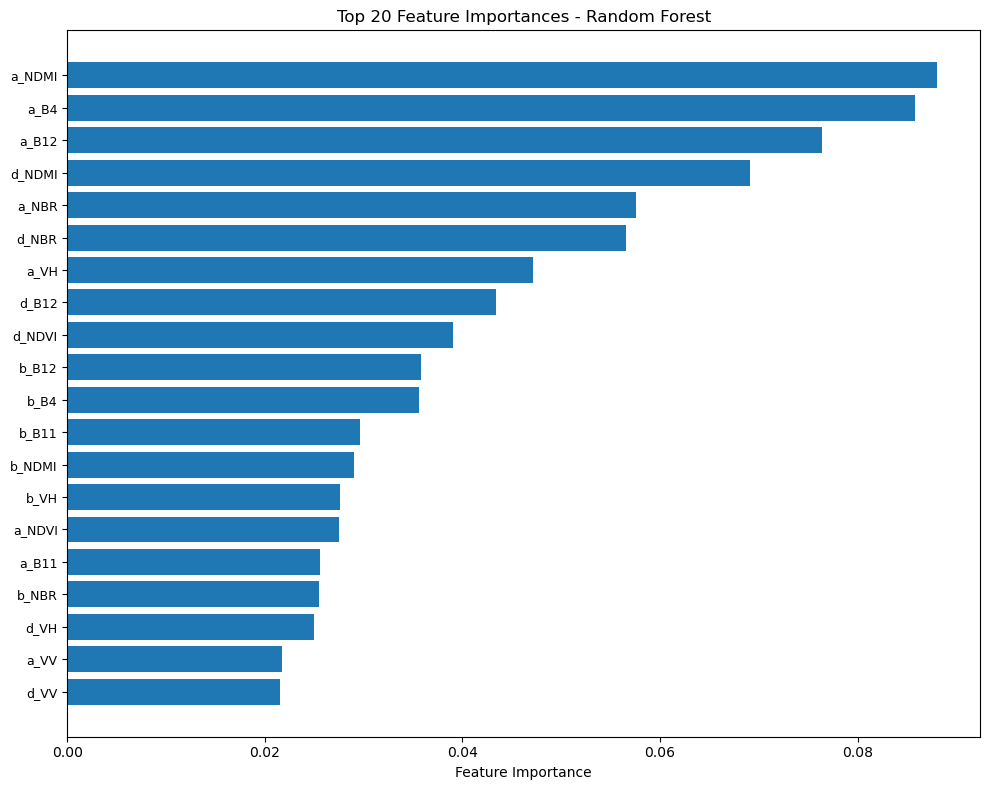


✓ Feature importance plot saved to figures/rf_feature_importance_top20.png


In [7]:
# Get feature importances
importances = model.feature_importances_
feature_names_list = get_feature_names()

# Create dataframe for easier analysis
import pandas as pd
feature_importance_df = pd.DataFrame({
    'feature': feature_names_list,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features:")
print("="*70)
for i, row in feature_importance_df.head(20).iterrows():
    print(f"{row['feature']:<50} {row['importance']:.6f}")

# Plot top 20
fig, ax = plt.subplots(figsize=(10, 8))
top_20 = feature_importance_df.head(20)
ax.barh(range(len(top_20)), top_20['importance'])
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['feature'], fontsize=9)
ax.set_xlabel('Feature Importance')
ax.set_title('Top 20 Feature Importances - Random Forest')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../figures/rf_feature_importance_top20.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance plot saved to figures/rf_feature_importance_top20.png")

## 6. Display Saved Visualization

Random Forest Evaluation Results:



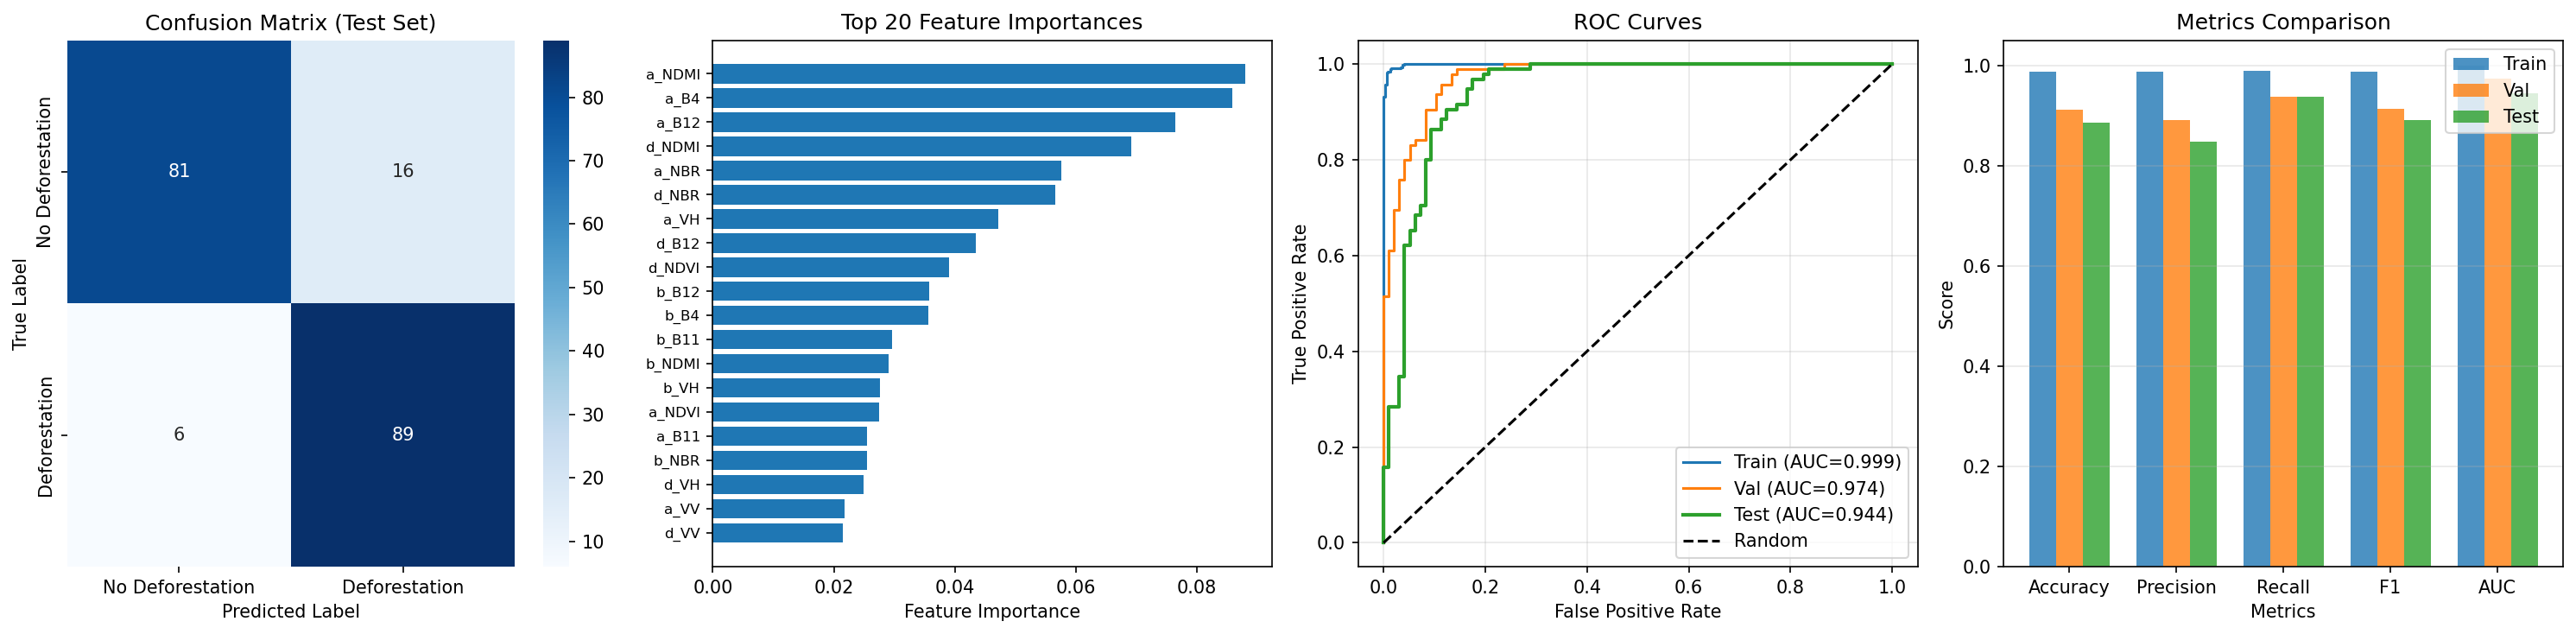

In [8]:
from IPython.display import Image, display

print("Random Forest Evaluation Results:\n")
display(Image(filename='../figures/random_forest_evaluation.png'))

## 7. Confusion Matrix Analysis

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from results
y_test_true = np.array(results['predictions']['test']['y_true'])
y_test_pred = np.array(results['predictions']['test']['y_pred'])

cm = confusion_matrix(y_test_true, y_test_pred)

print("\nConfusion Matrix (Test Set):")
print("="*70)
print(f"\n{' ':20} Predicted No Def    Predicted Def")
print(f"True No Deforestation:   {cm[0,0]:8d}          {cm[0,1]:8d}")
print(f"True Deforestation:      {cm[1,0]:8d}          {cm[1,1]:8d}")

# Calculate per-class metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nPer-class Analysis:")
print(f"  True Negatives (TN):  {tn:4d} - Correctly predicted No Deforestation")
print(f"  False Positives (FP): {fp:4d} - Incorrectly predicted Deforestation")
print(f"  False Negatives (FN): {fn:4d} - Missed Deforestation (Type II error)")
print(f"  True Positives (TP):  {tp:4d} - Correctly detected Deforestation")

print(f"\n  Sensitivity (Recall): {tp/(tp+fn):.4f} - % of actual deforestation detected")
print(f"  Specificity:          {tn/(tn+fp):.4f} - % of actual no-deforestation detected")


Confusion Matrix (Test Set):

                     Predicted No Def    Predicted Def
True No Deforestation:         81                16
True Deforestation:             6                89

Per-class Analysis:
  True Negatives (TN):    81 - Correctly predicted No Deforestation
  False Positives (FP):   16 - Incorrectly predicted Deforestation
  False Negatives (FN):    6 - Missed Deforestation (Type II error)
  True Positives (TP):    89 - Correctly detected Deforestation

  Sensitivity (Recall): 0.9368 - % of actual deforestation detected
  Specificity:          0.8351 - % of actual no-deforestation detected


## 8. Kết luận

✅ **Random Forest baseline đã được train thành công!**

### Điểm mạnh:
- ⚡ Training rất nhanh (~5-10 phút)
- 📊 Feature importance dễ interpret
- 💻 Chạy trên CPU, không cần GPU
- 🎯 Baseline tốt để so sánh với deep learning

### Điểm yếu:
- ⚠️ Cần handcraft features (không tự học)
- ⚠️ Capacity thấp hơn deep learning

### Tiếp theo:
- ▶️ **Notebook 04:** Train Simple CNN để so sánh
- ▶️ **Notebook 05:** Compare RF vs CNN